In [47]:
def sort (x):
    a = len(x)
    count = 0
    for i in range(0,a): 
        for j in range(i+1, a):
            if (x[i] > x[j]):
                temp = x[i]
                x[i] = x[j]
                x[j] = temp
                count = count + 1
    return x


Positive Examples:  [(2.326421334723885, 1.6209787180482385), (2.56943486278446, 1.7371533765218494), (3.0161535035332383, 2.1194322047836653), (3.3688973139013383, 2.124141191030695), (3.382169758086315, 2.3183991916512463), (3.4184677617688157, 2.52178886980588), (3.941520501942343, 2.6036559119009803)]
Negative Examples:  [((0.42026309032889975, 1.4782413783748065, 0.21182904390765978, 4.9400795656739005, 4.787981665210081, 4.302938582836697, 2.790856363052523, 2.2033254584331834), (0.2074055664626303, 1.8224819879144827, 4.238419269459755, 0.22498249370324763, 1.6501532024824488, 4.963955917794516, 0.18397557359729289, 3.2390753860655885)), ((0.5755928634980392, 0.443518761961309, 0.42597014378177, 4.540737688793742, 4.181619189832009, 4.273868747777253, 2.242035990034096, 2.0552326733378896), (0.5359045729119184, 2.3499202112094117, 3.2070721932702586, 0.5824580792482225, 2.1636742101053574, 3.359525197914275, 0.18445424734432003, 3.657654630586925)), ((0.5826964629669913, 1.43459

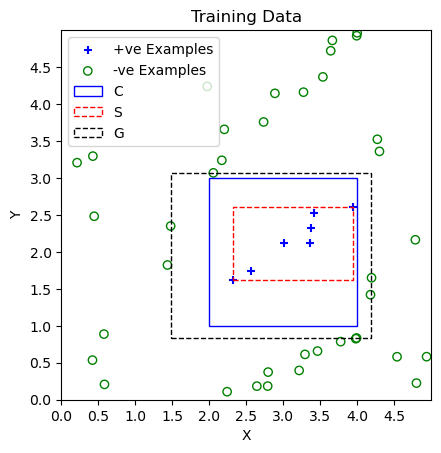

In [48]:
#Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

#Generating Positive Examples
xs = []
ys = []
xs = np.random.uniform(2,4,7)
ys = np.random.uniform(1,3,7)


#Sorting Positive Examples
xs_sorted = sort(xs)
ys_sorted = sort(ys)

#Dimensions of Class Boundary (C)
width = xs_sorted[6] - xs_sorted[0]
height = ys_sorted[6] - ys_sorted[0]

positions = [(x, y) for x, y in zip(xs_sorted, ys_sorted)]
print('Positive Examples: ', positions) 

#Generating Negative Examples
x1_low = np.random.uniform(0,2,3)
y1_low = np.random.uniform(0,1,3)

x1_mid = np.random.uniform(0,2,3)
y1_mid = np.random.uniform(1,3,3)

x1_high = np.random.uniform(0,2,3)
y1_high = np.random.uniform(3,5,3)

x2_low = np.random.uniform(4,5,3)
y2_low = np.random.uniform(0,1,3)

x2_mid = np.random.uniform(4,5,3)
y2_mid = np.random.uniform(1,3,3)

x2_high = np.random.uniform(4,5,3)
y2_high = np.random.uniform(3,5,3)

x1_mid_sorted = sort(x1_mid)
x2_mid_sorted = sort(x2_mid)

x3 = np.random.uniform(2,4,10)
y3 = np.random.uniform(0,1,10)

x3_sorted = sort(x3)
y3_sorted = sort(y3)

x4 = np.random.uniform(2,4,10)
y4 = np.random.uniform(3,5,10)

x4_sorted = sort(x4)
y4_sorted = sort(y4)

#combining all -ive
zipped_negative_x = zip(x1_low, x1_mid, x1_high, x2_low, x2_mid, x2_high, x3, x4)
zipped_negative_y = zip(y1_low, y1_mid, y1_high, y2_low, y2_mid, y2_high, y3, y4)

zipped_negative_x_sort = sort(list(zipped_negative_x))
zipped_negative_y_sort = sort(list(zipped_negative_y))

zipped_negative_list = [(x, y) for x, y in zip(zipped_negative_x_sort, zipped_negative_y_sort)]
print('Negative Examples: ', zipped_negative_list)


#Coordinates of the corners of Specific Boundary (S) 
          #BOTTOM LEFT
bottom_left_x = xs_sorted[0]
bottom_left_y = ys_sorted[0]

          #BOTTOM RIGHT
bottom_right_x = bottom_left_x + width
bottom_right_y = bottom_left_y

          #TOP RIGHT
top_right_x = bottom_right_x
top_right_y = bottom_left_y + height

          #TOP LEFT
top_left_x = bottom_left_x
top_left_y = bottom_left_y + height

#Extending the S Boundary vertically (by changing Y)
extension_bottom_y = bottom_left_y - y3_sorted[9]
extension_top_y = y4_sorted[0] - top_left_y

# new rect in Y extension 
bottom_left_extrect_y = bottom_left_y - extension_bottom_y
bottom_left_extrect_x = bottom_left_x
height_ext =  (top_left_y + extension_top_y) - bottom_left_extrect_y

#Extending the S Boundary horizontally (by changing X)
extension_left_x = bottom_left_extrect_x - x1_mid_sorted[2]

# Corner coordinates of new rectangle extended in Y (Maroon)
bottom_right_xrect = bottom_left_extrect_x + width
bottom_right_yrect = bottom_left_extrect_x  

top_left_xrect = bottom_left_extrect_x
top_left_yrect = bottom_left_extrect_y + height_ext

top_right_xrect = bottom_right_xrect
top_right_yrect = bottom_right_yrect + height_ext

# extension in x(horizontally)
extension_right_x = x2_mid_sorted[0] - bottom_right_xrect
width_ext =   extension_left_x + width + extension_right_x

fig, ax = plt.subplots()  
ax.set_xlim(0, 5)
ax.set_ylim(0, 5)
ax.set_aspect('equal')

#----------PRINTING RECTANGLES USING MATPLOTLIB----------#
#                   C
rect = mpatches.Rectangle((2,1),2,2,
                        fill = False,
                        color = "blue",
                        label="C",
                        linewidth = 1)

#                   S
rect_s = mpatches.Rectangle(positions[0],width,height,
                        fill = False,
                        color = "red",
                        linestyle = "--",
                        label="S",
                        linewidth = 1)

#                   G
rect_ext = mpatches.Rectangle(((x1_mid_sorted[2]),bottom_left_extrect_y),width_ext,height_ext,
                        fill = False,
                        color = "black",
                        linestyle = "--",
                        label = "G",
                        linewidth = 1)


#--------------------------------------------------------#

#----------SCATTER PLOT OF + AND - DATASETS----------#
ax.scatter(xs, ys, color='blue', marker='+',label = '+ve Examples')
ax.scatter(x1_low, y1_low, color='green', label = '-ve Examples', facecolors="none", edgecolors="g")
ax.scatter(x1_mid, y1_mid, color='green', facecolors="none", edgecolors="g")
ax.scatter(x1_high, y1_high, color='green', facecolors="none", edgecolors="g")
ax.scatter(x2_low, y2_low, color='green', facecolors="none", edgecolors="g")
ax.scatter(x2_mid, y2_mid, color='green', facecolors="none", edgecolors="g")
ax.scatter(x2_high, y2_high, color='green', facecolors="none", edgecolors="g")
ax.scatter(x3, y3, color='green', facecolors="none", edgecolors="g")
ax.scatter(x4, y4, color='green', facecolors="none", edgecolors="g")
plt.legend()
plt.title('Training Data')

plt.gca().add_patch(rect)
plt.gca().add_patch(rect_s)
plt.gca().add_patch(rect_ext)
plt.legend()

ax.set_xlabel('X')
ax.set_ylabel('Y')
axis = np.arange(0,5,0.5)

plt.xticks(axis)
plt.yticks(axis)
plt.show()
#----------------------------------------------------#


Percentage of positive points falling in S:  0.2
Percentage of negative points falling in S:  0.0
Percentage of positive points falling in G:  1.0
Percentage of negative points falling in G:  0.025


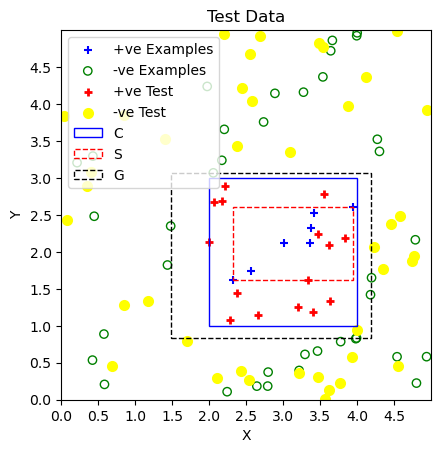

In [50]:
# Generating test data
#Generating Positive Examples

t_xs = []
t_ys = []
t_xs = np.random.uniform(2,4,15)
t_ys = np.random.uniform(1,3,15)
test_positive_samples = [(x, y) for x, y in zip(t_xs, t_ys)]

#t_ys = np.random.uniform(1,3,7)

strict_min_x = np.min(xs)
strict_max_x = np.max(xs)
strict_min_y = np.min(ys)
strict_max_y = np.max(ys)

# print('min x:', strict_min_x)
# print('max x:',strict_max_x)
# print('min y:',strict_min_y)
# print('max y:',strict_max_y)
print()

#Generating Negative Examples
t_x1 = np.random.uniform(0,2,10)
t_y1 = np.random.uniform(0,5,10)
list_1 = [(x, y) for x, y in zip(t_x1, t_y1)]

t_x2 = np.random.uniform(4,5,10)
t_y2 = np.random.uniform(0,5,10)
list_2 = [(x, y) for x, y in zip(t_x2, t_y2)]

t_x3 = np.random.uniform(2,4,10)
t_y3 = np.random.uniform(0,1,10)
list_3 = [(x, y) for x, y in zip(t_x3, t_y3)]

t_x4 = np.random.uniform(2,4,10)
t_y4 = np.random.uniform(3,5,10)
list_4 = [(x, y) for x, y in zip(t_x4, t_y4)]

test_negative_samples = np.concatenate((list_1,list_2,list_3,list_4))
# print(test_negative_samples)
# print(np.shape(test_negative_samples))

positive_points_in_S = 0
negative_points_in_S = 0
positive_points_in_G = 0
negative_points_in_G = 0

general_min_x = x1_mid_sorted[2]
general_max_x = x1_mid_sorted[2] + width_ext
general_min_y = bottom_left_extrect_y
general_max_y = bottom_left_extrect_y + height_ext


for sample in test_positive_samples:
    if (sample[0] > strict_min_x and sample[0] < strict_max_x
        and sample[1] > strict_min_y and sample[1] < strict_max_y):
        positive_points_in_S += 1
    if (sample[0] > general_min_x and sample[0] < general_max_x
        and sample[1] > general_min_y and sample[1] < general_max_y):
        positive_points_in_G += 1

for sample in test_negative_samples:
    if (sample[0] > strict_min_x and sample[0] < strict_max_x
        and sample[1] > strict_min_y and sample[1] < strict_max_y):
        negative_points_in_S += 1
    if (sample[0] > general_min_x and sample[0] < general_max_x
    and sample[1] > general_min_y and sample[1] < general_max_y):
        negative_points_in_G += 1

print(
"Percentage of positive points falling in S: ",
positive_points_in_S / len(test_positive_samples),
)
print(
"Percentage of negative points falling in S: ",
negative_points_in_S / len(test_negative_samples),
)
print(
"Percentage of positive points falling in G: ",
positive_points_in_G / len(test_positive_samples),
)
print(
"Percentage of negative points falling in G: ",
negative_points_in_G / len(test_negative_samples),
)

# RECT

fig, ax = plt.subplots()  
ax.set_xlim(0, 5)
ax.set_ylim(0, 5)
ax.set_aspect('equal')

#----------PRINTING RECTANGLES USING MATPLOTLIB----------#
#                   C
rect = mpatches.Rectangle((2,1),2,2,
                        fill = False,
                        color = "blue",
                        label="C",
                        linewidth = 1)

#                   S
rect_s = mpatches.Rectangle(positions[0],width,height,
                        fill = False,
                        color = "red",
                        linestyle = "--",
                        label="S",
                        linewidth = 1)

#                   G
rect_ext = mpatches.Rectangle(((x1_mid_sorted[2]),bottom_left_extrect_y),width_ext,height_ext,
                        fill = False,
                        color = "black",
                        linestyle = "--",
                        label = "G",
                        linewidth = 1)


#--------------------------------------------------------#

#----------SCATTER PLOT OF + AND 
# POSITIVE DATA
ax.scatter(xs, ys, color='blue', marker='+',label = '+ve Examples')

# NEGATIVE DATA
ax.scatter(x1_low, y1_low, color='green', label = '-ve Examples', facecolors="none", edgecolors="g")
ax.scatter(x1_mid, y1_mid, color='green', facecolors="none", edgecolors="g")
ax.scatter(x1_high, y1_high, color='green', facecolors="none", edgecolors="g")
ax.scatter(x2_low, y2_low, color='green', facecolors="none", edgecolors="g")
ax.scatter(x2_mid, y2_mid, color='green', facecolors="none", edgecolors="g")
ax.scatter(x2_high, y2_high, color='green', facecolors="none", edgecolors="g")
ax.scatter(x3, y3, color='green', facecolors="none", edgecolors="g")
ax.scatter(x4, y4, color='green', facecolors="none", edgecolors="g")

# TEST DATA
plt.scatter(t_xs, t_ys, color = 'red', label = '+ve Test', marker = '+', linewidths= 2)
plt.scatter(test_negative_samples[:,0], test_negative_samples[:,1], label = '-ve Test', color = 'yellow', marker = 'o', linewidths= 2)
plt.title('Test Data')
plt.legend()



plt.gca().add_patch(rect)
plt.gca().add_patch(rect_s)
plt.gca().add_patch(rect_ext)
plt.legend()

ax.set_xlabel('X')
ax.set_ylabel('Y')
axis = np.arange(0,5,0.5)

plt.xticks(axis)
plt.yticks(axis)
plt.show()


